In [2]:
# Packages
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style("dark")

import matplotlib.pyplot as plt
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [4]:
# Importing data 
df = pd.read_csv('./Mall_Customers.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


***

### Average annual income per gender

In [20]:
# renaming column names for convenience 
df = df.rename(columns={'Annual Income (k$)':'annual_income','Spending Score (1-100)':'spending_score'})
df

,CustomerID,Gender,Age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


<AxesSubplot:title={'center':'Average Annual_income and spending score per gender'}, ylabel='Gender'>

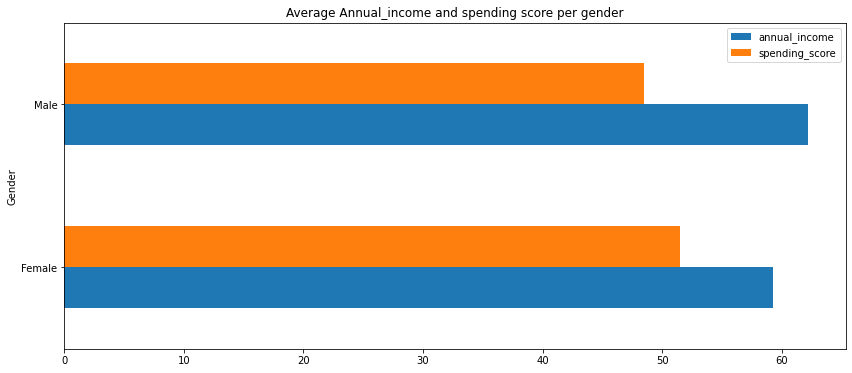

In [31]:
g1 = df.groupby('Gender')[['annual_income','spending_score']].mean()
g1.plot(kind='barh',figsize=(14,6),title='Average annual income and spending score per gender')

In [34]:
# Correlation
df.corr()

,CustomerID,Age,annual_income,spending_score
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
annual_income,0.977548,-0.012398,1.000000,0.009903
spending_score,0.013835,-0.327227,0.009903,1.000000


### Income distribution per gender 


[Text(0.5, 1.0, 'Distrbution of income per Gender')]

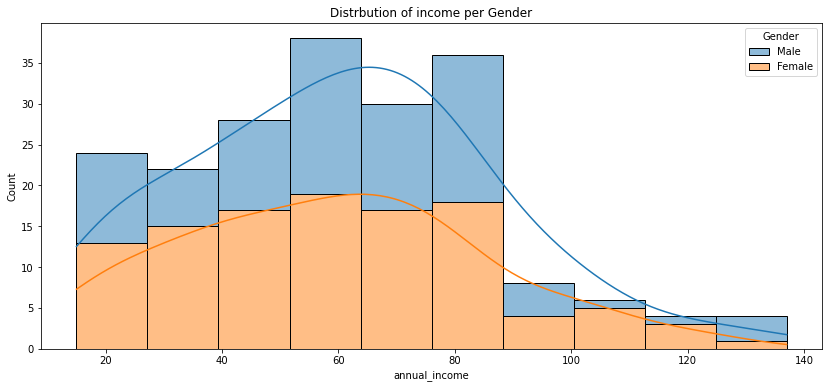

In [131]:
plt.figure(figsize=(14,6))
sns.histplot(x=df["annual_income"],hue=df['Gender'],kde=True,multiple='stack').set(title='Distrbution of income per Gender')

### Average annual income per age group

<AxesSubplot:title={'center':'Average annual income per age group'}, ylabel='age_group'>

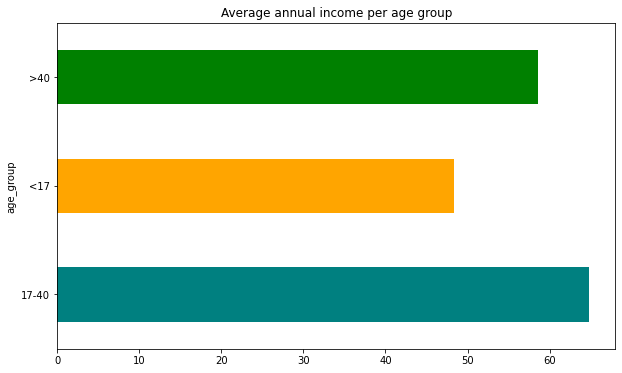

In [127]:
conditions = [
    (df['Age']<=21),
    (df['Age']>21) & (df['Age']<=40),
    (df['Age']>40) 
]

values = ['<17','17-40','>40']
df['age_group'] = np.select(conditions,values)
df.groupby('age_group')['annual_income'].mean().plot(kind='barh',title='Average annual income per age group',color=['teal','orange','green'],figsize=(10,6))

***

# K Means Clustering 

<AxesSubplot:xlabel='spending_score', ylabel='annual_income'>

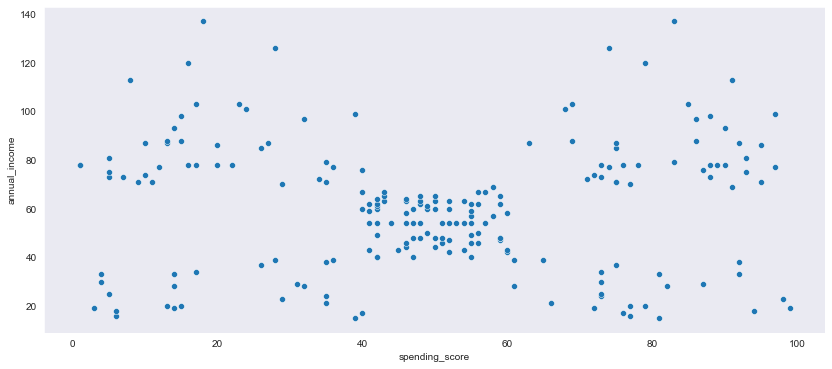

In [164]:
df2 = df[['spending_score','annual_income']]
df2.head()
plt.figure(figsize=(14,6))
sns.scatterplot(df2['spending_score'],df2['annual_income'],y='Annual Income',x='spending_score')

In [90]:
# kmean
from sklearn.cluster import KMeans

The ‘Within Sum of squares’ or WSS value is defined as the sum of the squared distance between each member of the cluster and its centroid. Mathematically, this can be represented as: WSS = SUM(X-C)^2

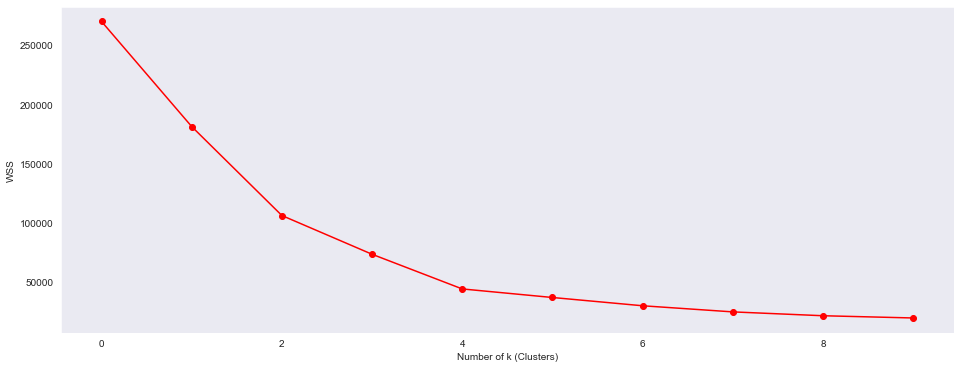

In [165]:
wss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(df2)
    wss.append(km.inertia_)
    
plt.figure(figsize=(16,6))
plt.plot(wss,marker="o",c='r')
plt.xlabel('Number of k (Clusters)')
plt.ylabel('WSS')
plt.show()

Selecting 5 clusters based on the elbow graph above

In [166]:
km=KMeans(n_clusters=5)
km.fit(df2)
cluster=km.predict(df2)
df2['Group'] = cluster
df2.head()

,spending_score,annual_income,Group
0,39,15,3
1,81,15,4
2,6,16,3
3,77,16,4
4,40,17,3


# Plotting 

In [171]:
# Average annual income 
df['annual_income'].mean()

60.56

In [172]:
# Average spending income 
df['spending_score'].mean()

50.2

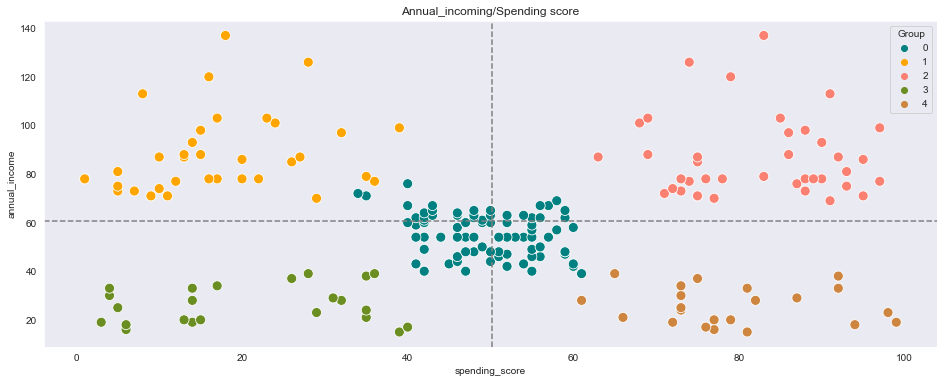

In [176]:
plt.figure(figsize=(16,6))
sns.scatterplot(df2['spending_score'],df2['annual_income'],y='Annual Income',x='spending_score',hue=df2['Group'],s=100,palette=['teal','orange','salmon','olivedrab','peru',]).set(title='Annual_incoming/Spending score')

plt.axvline(50.2, color='grey',linestyle ="--") # vertical
plt.axhline(60.56, color='grey',linestyle ="--") # horizontal

In [182]:
from prettytable import PrettyTable

In [184]:
# columns
myTable = PrettyTable(["Cluster", "Description"])
 
# Add rows
myTable.add_row(["0", "Average spending score with Average annual income"])
myTable.add_row(["1", "Lower than average spending socre with high annual income"])
myTable.add_row(["2", "High spending score with higher than average annual income"])
myTable.add_row(["3", "Lower than average spending score with low annual income"])
myTable.add_row(["4", "High spending score with lower than average annual income"])

myTable

Cluster,Description
0,Average spending score with Average annual income
1,Lower than average spending socre with high annual income
2,High spending score with higher than average annual income
3,Lower than average spending score with low annual income
4,High spending score with lower than average annual income
